### Implement a PsuedoCode RNN

In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

    successive_outputs.append(output_t)

    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)
print(final_output_sequence)

[ 0.99999996  0.99999997  0.99999996 ...,  1.          1.          1.        ]


In [2]:
from util import print_curves

Using TensorFlow backend.


### SimpleRNN

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### Try on IMDB Dataset

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
y_train[0]

1

In [9]:
from keras.layers import Dense

model = Sequential()
# input length not required because RNN between Flatten / Dense?
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.5843 - acc: 0.6653 - val_loss: 0.4242 - val_acc: 0.8134
Epoch 2/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.3713 - acc: 0.8459 - val_loss: 0.4494 - val_acc: 0.8304
Epoch 3/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.2918 - acc: 0.8828 - val_loss: 0.3324 - val_acc: 0.8700
Epoch 4/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.2514 - acc: 0.9017 - val_loss: 0.3635 - val_acc: 0.8568
Epoch 5/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.2332 - acc: 0.9127 - val_loss: 0.4448 - val_acc: 0.8468
Epoch 6/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.2645 - acc: 0.8967 - val_loss: 0.4057 - val_acc: 0.8398
Epoch 7/10
20000/20000 [==============================] - 113s 6ms/step - loss: 0.2352 - acc: 0.9108 - val_loss: 0.4215 - v

Max Val Acc: 0.87
Min Val Loss: 0.332370039129


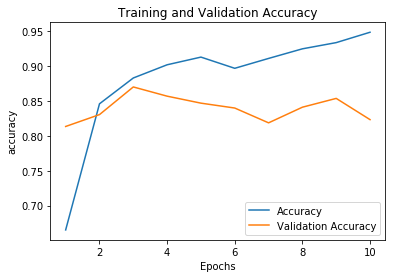

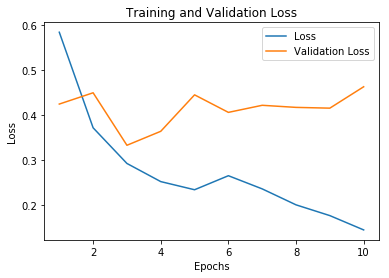

In [11]:
print_curves(history)

Validation peaked at 87%, not bad considering we're throwing away all words after 500

### LSTM, preferred over SimplerRNN

In [12]:
from keras.layers import LSTM

model = Sequential()
# input length not required because RNN between Flatten / Dense?
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.2)

model.save('./models/imdb_25k_lstm')

print_curves(history)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 473s 24ms/step - loss: 0.4184 - acc: 0.8111 - val_loss: 0.3672 - val_acc: 0.8626
Epoch 2/10
 3168/20000 [===>..........................] - ETA: 6:12 - loss: 0.2593 - acc: 0.8999

KeyboardInterrupt: 